In [1]:
!pip install --upgrade fastai

In [2]:
!pip install -Uqq fastbook

In [3]:
import fastai
from fastai.vision import *
from fastai.vision.all import *
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *
from pathlib import Path
import pandas as pd
import os

In [4]:
from __future__ import print_function
import time
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook as tqdm

In [5]:
shoes_df = pd.read_csv('cotatenis_sneakers_kaggle.csv')

In [6]:
shoes_df

,sku,product_name,brand
0,GZ7945,Tênis Masculino NMDR1 - Cinza,adidas
1,GY5028,Tênis Masculino Outrage - Preto,adidas
2,GZ7925,Tênis Masculino Nmdr1 Refined - Branco,adidas
3,EF4400,Tênis Masculino Marathon Tech - Vinho,adidas
4,Q47100,Tênis Masculino Mixing Eras - Preto,adidas
...,...,...,...
3401,EG4126,Tênis Infantil adidas Tensaur Run,adidas
3402,FY8183,Tênis adidas Lite Racer Rbn 2.0 - Masculino,adidas
3403,EH1425,Tênis adidas Lite Racer 2.0 - Masculino,adidas
3404,H69201,Tênis adidas Defiant Generation - Masculino,adidas


In [7]:
shoes_df.groupby("brand").size()

brand
Jordan     167
Nike      1936
adidas    1303
dtype: int64

In [8]:
path = 'sneakers_dataset/sneakers_dataset/'
p_path = Path(path)
fns = get_image_files(path)

In [9]:
shoes_df['image_file'] = ''

for filename in os.listdir(path):
    if filename.endswith('.jpg'):
        sku = filename.split('_')[0]
        row = shoes_df.loc[shoes_df['sku'] == sku]
        if not row.empty:
            shoes_df.loc[row.index[0], 'image_file'] = filename

In [10]:
shoes_df.replace('', np.nan, inplace=True)

In [11]:
shoes_df.dropna(subset=['image_file'], inplace=True)

In [12]:
shoes_df

,sku,product_name,brand,image_file
1,GY5028,Tênis Masculino Outrage - Preto,adidas,GY5028_img_8365_1_7.jpg
3,EF4400,Tênis Masculino Marathon Tech - Vinho,adidas,EF4400_img_4164_47.jpg
4,Q47100,Tênis Masculino Mixing Eras - Preto,adidas,Q47100_Tenis-adidas-Retropy-P9-Masculino-Multicolor-6.jpg
6,FV1836,Tênis Masculino Yung-1 - Azul,adidas,FV1836_img_3919_3_24.jpg
8,H01996,Tênis Masculino Fluidup - Preto,adidas,H01996_Tenis_Fluidup_Preto_H01996_09_standard_U3AAzHzr-e.jpg
...,...,...,...,...
3388,H69207,Tênis adidas Defiant Generation - Feminino,adidas,H69207_4064047399752_96501949A2_tenis-adidas-defiant-generation-feminino-img.jpg
3391,CU3504-001,Tênis Nike Renew Run 2 - Masculino,Nike,CU3504-001_194502207934_95765802A1_tenis-nike-renew-run-2-masculino-img.jpg
3393,DA8697-800,Tênis Nike Pegasus Trail 3 - Masculino,Nike,DA8697-800_194958688639_96681411A2_tenis-nike-pegasus-trail-3-masculino-img.jpg
3397,DM0838-500,Tênis Nike Court Vision Lo - Masculino,Nike,DM0838-500_195243506058_96827718A2_tenis-nike-court-vision-lo-masculino-img.jpg


In [13]:
# new_shoes_df.loc[new_shoes_df['image_file'] == 'GY5028_img_8365_1_7.jpg']

There are 1004 pictures of Sneakers.


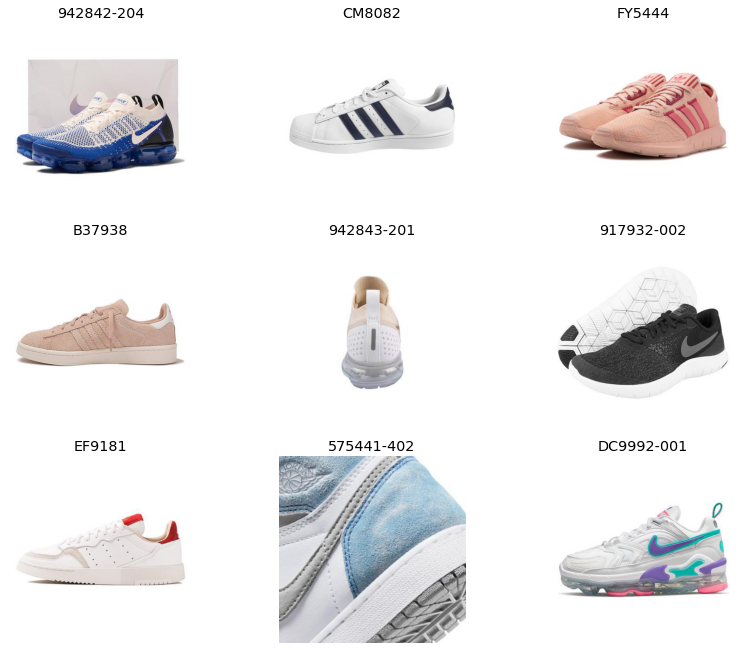

In [14]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Get the list of image files that exist in the dataframe
df_images = shoes_df['image_file'].values.tolist()
# df_images = [x for x in df_images if x != '']


# Filter the list of images to only include those that exist in the dataframe
images = [img for img in os.listdir(path) if img in df_images]

print(f'There are {len(images)} pictures of Sneakers.')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(images))
    # https://matplotlib.org/users/image_tutorial.html
    img = plt.imread(path + images[rnd_indx])
    imgplot = axis.imshow(img)
    axis.set_title(images[rnd_indx].split('_')[0])
    axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [15]:
import os
from PIL import Image
import pandas as pd


widths = []
heights = []

for filename in shoes_df['image_file'].tolist():
    img_path = os.path.join(path, filename)
    img = Image.open(img_path)
    width, height = img.size
    widths.append(width)
    heights.append(height)

unique_widths = set(widths)
unique_heights = set(heights)

print("Unique widths:", len(unique_widths))
print("Unique heights:", len(unique_heights))

# Print the value counts
print("Widths value counts:")
print(pd.Series(widths).value_counts())
print()
print("Heights value counts:")
print(pd.Series(heights).value_counts())

Unique widths: 1
Unique heights: 1
Widths value counts:
400    1004
dtype: int64

Heights value counts:
400    1004
dtype: int64


In [16]:
images_to_remove = []
valid_filenames = set(shoes_df['image_file'])
threshold = 10

width_counts = pd.Series(widths).value_counts()
height_counts = pd.Series(heights).value_counts()

# Loop through images and get width and height values
for filename in os.listdir(path):
    if filename.endswith('.jpg') and filename in valid_filenames:
        image = Image.open(os.path.join(path, filename))
        width, height = image.size
        
        # Check value counts and add image to list if below threshold
        if pd.Series(width_counts)[width] < threshold or pd.Series(height_counts)[height] < threshold:
            images_to_remove.append(filename)

# Remove images from dataset
for filename in images_to_remove:
    os.remove(os.path.join(path, filename))

In [17]:
p_path = Path(path)
fns = get_image_files(path)
print(len(fns))

1208


In [18]:
# import os
# import torch
# import torchvision.transforms as transforms
# from PIL import Image

# class CustomDataset(torch.utils.data.Dataset):
#     def __init__(self, data_path, transform=None):
#         self.data_path = data_path
#         self.transform = transform
#         self.filenames = os.listdir(self.data_path)

#     def __len__(self):
#         return len(self.filenames)

#     def __getitem__(self, index):
#         filename = self.filenames[index]
#         img_path = os.path.join(self.data_path, filename)
#         img = Image.open(img_path).convert('RGB')
#         if self.transform:
#             img = self.transform(img)

#         # extract class label from filename
#         class_label = (filename.split('_')[0])

#         return img, class_label

# # define the path to your dataset
# data_path = "sneakers_dataset/sneakers_dataset/"

# # define the transformation to be applied to each image
# transform = transforms.Compose([
#     transforms.Resize(400),
#     transforms.CenterCrop(400),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# ])

# # create the custom dataset
# dataset = CustomDataset(data_path=data_path, transform=transform)

# # create the dataloader
# batch_size = 32
# dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# # iterate over the dataloader
# # for batch_idx, (data, target) in enumerate(dataloader):
# #     # do something with the data and target
# #     pass

# imgs, label = next(iter(dataloader))
# imgs = imgs.numpy().transpose(0, 2, 3, 1)


In [19]:
# import os
# import torch
# import torchvision.transforms as transforms
# from PIL import Image

# class CustomDataset(torch.utils.data.Dataset):
#     def __init__(self, data_path, transform=None):
#         self.data_path = data_path
#         self.transform = transform
#         self.filenames = os.listdir(self.data_path)

#     def __len__(self):
#         return len(self.filenames)

#     def __getitem__(self, index):
#         filename = self.filenames[index]
#         img_path = os.path.join(self.data_path, filename)
#         img = Image.open(img_path).convert('RGB')
#         if self.transform:
#             img = self.transform(img)

#         # extract class label from filename
#         print(filename.split("_")[1].split("-")[1])
#         class_label = (filename.split("_")[1].split("-")[1])

#         return img, class_label

# # define the path to your dataset
# data_path = "sneakers_dataset/sneakers_dataset/"

# # define the transformation to be applied to each image
# transform = transforms.Compose([
#     transforms.Resize(400),
#     transforms.CenterCrop(400),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# ])

# # create the custom dataset
# dataset = CustomDataset(data_path=data_path, transform=transform)

# # create the dataloader
# batch_size = 32
# dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# # iterate over the dataloader
# # for batch_idx, (data, target) in enumerate(dataloader):
# #     # do something with the data and target
# #     pass

# imgs, labels = next(iter(dataloader))
# imgs = imgs.numpy().transpose(0, 2, 3, 1)


In [20]:
batch_size = 32
image_size = 400

# random_transforms = [transforms.ColorJitter(), transforms.RandomRotation(degrees=20)]

transform = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Define a custom dataset that uses only the images with filenames that exist in the dataframe
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, transform):
        self.df = dataframe
        self.transform = transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        # Get the image filename and corresponding label (brand)
        img_filename = self.df.iloc[index]['image_file']
        label = self.df.iloc[index]['brand']
        
        # Load the image and apply the transforms
        img = Image.open(os.path.join('sneakers_dataset/sneakers_dataset/', img_filename))
        img = self.transform(img)
        
        return img, label

# Create the custom dataset
custom_dataset = CustomDataset(shoes_df, transform)

# Create the dataloader
train_loader = torch.utils.data.DataLoader(custom_dataset, shuffle=True,
                                           batch_size=batch_size)


imgs, label = next(iter(train_loader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


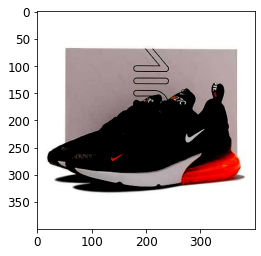

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


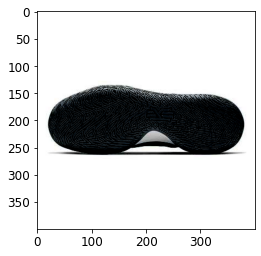

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


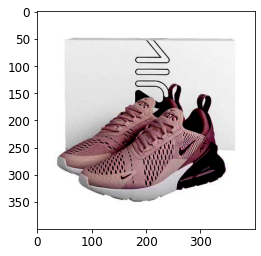

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


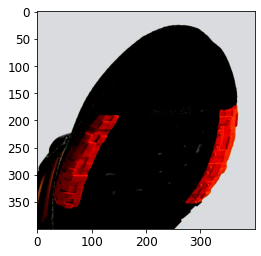

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


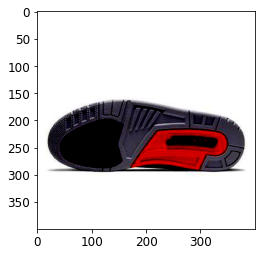

In [21]:
for i in range(5):
    plt.imshow(imgs[i])
    plt.show()

In [22]:
def weights_init(m):
    """
    Takes as input a neural network m that will initialize all its weights.
    """
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [23]:
# class Generator(nn.Module):
#     def __init__(self, nz=128, channels=3):
#         super(Generator, self).__init__()
        
#         self.nz = nz
#         self.channels = channels
        
#         def convlayer(n_input, n_output, k_size=4, stride=2, padding=0):
#             block = [
#                 nn.ConvTranspose2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False),
#                 nn.BatchNorm2d(n_output),
#                 nn.ReLU(inplace=True),
#             ]
#             return block

#         self.model = nn.Sequential(
#             *convlayer(self.nz, 1024, 4, 1, 0), # Fully connected layer via convolution.
#             *convlayer(1024, 512, 4, 2, 1),
#             *convlayer(512, 256, 4, 2, 1),
#             *convlayer(256, 128, 4, 2, 1),
#             *convlayer(128, 64, 4, 2, 1),
#             *convlayer(64, 32, 4, 2, 1),
#             *convlayer(32, 16, 4, 2, 1),
# #             nn.ConvTranspose2d(16, self.channels, 4, 2, 1),
#             nn.Tanh()
#         )

#     def forward(self, z):
#         z = z.view(-1, self.nz, 1, 1)
#         img = self.model(z)
#         return img


In [24]:
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize

def generator(df, batch_size=32, image_size=(400, 400)):
    num_samples = len(df)
    while True:
        indices = np.random.choice(num_samples, batch_size)
        batch = df.iloc[indices]
        
        # Load images and resize to image_size
        images = []
        for i in range(batch_size):
            img = Image.open(batch.iloc[i]['image_path'])
            img = img.resize(image_size)
            img = np.array(img)
            images.append(img)
        
        # Normalize images
        images = np.array(images) / 255.0
        
        # Extract labels
        labels = to_categorical(batch['brand'], num_classes=NUM_CLASSES)
        
        yield images, labels


In [25]:
# import torch.nn as nn

# class Discriminator(nn.Module):
#     def __init__(self, img_size=400, channels=3, features_d=64):
#         super(Discriminator, self).__init__()
#         self.img_size = img_size
#         self.features_d = features_d
#         self.channels = channels

#         self.conv1 = nn.Conv2d(channels, features_d, kernel_size=4, stride=2, padding=1, bias=False)
#         self.conv2 = nn.Conv2d(features_d, features_d * 2, kernel_size=4, stride=2, padding=1, bias=False)
#         self.conv3 = nn.Conv2d(features_d * 2, features_d * 4, kernel_size=4, stride=2, padding=1, bias=False)
#         self.conv4 = nn.Conv2d(features_d * 4, features_d * 8, kernel_size=4, stride=2, padding=1, bias=False)
#         self.conv5 = nn.Conv2d(features_d * 8, 1, kernel_size=4, stride=2, padding=0, bias=False)

#     def forward(self, x):
#         batch_size = x.size(0)
#         x = self.conv1(x)
#         leaky_relu = nn.LeakyReLU(0.2, inplace=True)
#         x = leaky_relu(x)

#         x = self.conv2(x)
#         x = nn.BatchNorm2d(self.features_d * 2)(x)
#         leaky_relu = nn.LeakyReLU(0.2, inplace=True)
#         x = leaky_relu(x)

#         x = self.conv3(x)
#         x = nn.BatchNorm2d(self.features_d * 4)(x)
#         leaky_relu = nn.LeakyReLU(0.2, inplace=True)
#         x = leaky_relu(x)

#         x = self.conv4(x)
#         x = nn.BatchNorm2d(self.features_d * 8)(x)
#         leaky_relu = nn.LeakyReLU(0.2, inplace=True)
#         x = leaky_relu(x)

#         x = self.conv5(x)
#         x = nn.Sigmoid()(x)

#         return x.view(batch_size, -1)


In [26]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU, Dropout, Flatten, Dense


def Discriminator(input_shape):
    model = tf.keras.Sequential(name='discriminator')

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), strides=(2, 2), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    model.add(Conv2D(256, (3, 3), strides=(2, 2), padding='same'))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.25))

    # Flatten and output
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model



In [27]:
# import tensorflow as tf

# # Define the discriminator
# class Discriminator(nn.Module):
#     model = tf.keras.Sequential()
#     model.add(tf.keras.layers.Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=[28, 28, 1]))
#     model.add(tf.keras.layers.LeakyReLU())
#     model.add(tf.keras.layers.Dropout(0.5))
#     model.add(tf.keras.layers.Conv2D(128, (3,3), strides=(2,2), padding='same'))
#     model.add(tf.keras.layers.LeakyReLU())
#     model.add(tf.keras.layers.Dropout(0.5))
#     model.add(tf.keras.layers.Flatten())
#     model.add(tf.keras.layers.Dense(1))

#     return model

# # Instantiate the discriminator
# discriminator = make_discriminator_model()


In [28]:
# class Discriminator(nn.Module):
#     def __init__(self, img_size=400, channels=3):
#         super(Discriminator, self).__init__()
#         self.img_size = img_size
#         self.channels = channels
#         self.conv1 = nn.Conv2d(channels, 64, 4, 2, 1, bias=False)
#         self.conv2 = nn.Conv2d(64, 128, 4, 2, 1, bias=False)
#         self.conv3 = nn.Conv2d(128, 256, 4, 2, 1, bias=False)
#         self.conv4 = nn.Conv2d(256, 512, 4, 2, 1, bias=False)
#         self.conv5 = nn.Conv2d(512, 1, 4, 1, 0, bias=False)

#     def forward(self, x):
#         x = F.leaky_relu(self.conv1(x), 0.2)
#         x = F.leaky_relu(self.conv2(x), 0.2)
#         x = F.leaky_relu(self.conv3(x), 0.2)
#         x = F.leaky_relu(self.conv4(x), 0.2)
#         x = self.conv5(x)
#         return x.view(-1, 1)


In [29]:
# class Generator(nn.Module):
#     def __init__(self, nz=128, channels=3):
#         super(Generator, self).__init__()
        
#         self.nz = nz
#         self.channels = channels
        
#         def convlayer(n_input, n_output, k_size=4, stride=2, padding=0):
#             block = [
#                 nn.ConvTranspose2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False),
#                 nn.BatchNorm2d(n_output),
#                 nn.ReLU(inplace=True),
#             ]
#             return block

#         self.model = nn.Sequential(
#             *convlayer(self.nz, 1024, 4, 1, 0), # Fully connected layer via convolution.
#             *convlayer(1024, 512, 4, 2, 1),
#             *convlayer(512, 256, 4, 2, 1),
#             *convlayer(256, 128, 4, 2, 1),
#             *convlayer(128, 64, 4, 2, 1),
#             nn.ConvTranspose2d(64, self.channels, 3, 1, 1),
#             nn.Tanh()
#         )

#     def forward(self, z):
#         z = z.view(-1, self.nz, 1, 1)
#         img = self.model(z)
#         return img

    
# class Discriminator(nn.Module):
#     def __init__(self, channels=3):
#         super(Discriminator, self).__init__()
        
#         self.channels = channels

#         def convlayer(n_input, n_output, k_size=4, stride=2, padding=0, bn=False):
#             block = [nn.Conv2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False)]
#             if bn:
#                 block.append(nn.BatchNorm2d(n_output))
#             block.append(nn.LeakyReLU(0.2, inplace=True))
#             return block

#         self.model = nn.Sequential(
#             *convlayer(self.channels, 32, 4, 2, 1),
#             *convlayer(32, 64, 4, 2, 1),
#             *convlayer(64, 128, 4, 2, 1, bn=True),
#             *convlayer(128, 256, 4, 2, 1, bn=True),
#             nn.Conv2d(256, 1, 4, 1, 0, bias=False),  # FC with Conv.
#         )

#     def forward(self, imgs):
#         logits = self.model(imgs)
#         out = torch.sigmoid(logits)
    
#         return out.view(-1, 1)

In [30]:
batch_size = 32
LR_G = 0.001
LR_D = 0.0005

beta1 = 0.5
epochs = 100

real_label = 0.9
fake_label = 0
nz = 128

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [31]:
netG = Generator(nz).to(device)
netD = Discriminator().to(device)

criterion = nn.BCELoss()

optimizerD = optim.Adam(netD.parameters(), lr=LR_D, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR_G, betas=(beta1, 0.999))

fixed_noise = torch.randn(25, nz, 1, 1, device=device)

G_losses = []
D_losses = []
epoch_time = []

TypeError: Generator() takes no arguments

In [ ]:
def plot_loss (G_losses, D_losses, epoch):
    plt.figure(figsize=(10,5))
    plt.title("Generator and Discriminator Loss - EPOCH "+ str(epoch))
    plt.plot(G_losses,label="G")
    plt.plot(D_losses,label="D")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [ ]:
def show_generated_img(n_images=5):
    sample = []
    for _ in range(n_images):
        noise = torch.randn(1, nz, 1, 1, device=device)
        gen_image = netG(noise).to("cpu").clone().detach().squeeze(0)
        gen_image = gen_image.numpy().transpose(1, 2, 0)
        sample.append(gen_image)
    
    figure, axes = plt.subplots(1, len(sample), figsize = (64,64))
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = sample[index]
        axis.imshow(image_array)
        
    plt.show()
    plt.close()

In [ ]:

# for epoch in range(epochs):
    
#     start = time.time()
#     for ii, (real_images, train_labels) in tqdm(enumerate(train_loader), total=len(train_loader)):
#         ############################
#         # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
#         ###########################
#         # train with real
#         netD.zero_grad()
#         real_images = real_images.to(device)
#         batch_size = real_images.size(0)
#         labels = torch.full((batch_size,), real_label, device=device)

#         output = netD(real_images)
#         errD_real = criterion(output, labels)
#         errD_real.backward()
#         D_x = output.mean().item()

#         # train with fake
#         noise = torch.randn(batch_size, nz, 1, 1, device=device)
#         fake = netG(noise)
#         labels.fill_(fake_label)
#         output = netD(fake.detach())
#         errD_fake = criterion(output, labels)
#         errD_fake.backward()
#         D_G_z1 = output.mean().item()
#         errD = errD_real + errD_fake
#         optimizerD.step()

#         ############################
#         # (2) Update G network: maximize log(D(G(z)))
#         ###########################
#         netG.zero_grad()
#         labels.fill_(real_label)  # fake labels are real for generator cost
#         output = netD(fake)
#         errG = criterion(output, labels)
#         errG.backward()
#         D_G_z2 = output.mean().item()
#         optimizerG.step()
        
#         # Save Losses for plotting later
#         G_losses.append(errG.item())
#         D_losses.append(errD.item())
        
#         if (ii+1) % (len(train_loader)//2) == 0:
#             print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
#                   % (epoch + 1, epochs, ii+1, len(train_loader),
#                      errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
            
#     plot_loss (G_losses, D_losses, epoch)
#     G_losses = []
#     D_losses = []
#     if epoch % 10 == 0:
#         show_generated_img()

#     epoch_time.append(time.time()- start)
    
# #             valid_image = netG(fixed_noise)

In [ ]:
# # retrieve real labels and encode them as integers
# brands = shoes_df['brand'].unique()
# brand_to_int = {brand: i for i, brand in enumerate(brands)}
# int_to_brand = {i: brand for brand, i in brand_to_int.items()}

# # define batch size and create DataLoader
# batch_size = 32
# data_loader = torch.utils.data.DataLoader(custom_dataset, shuffle=True,
#                                            batch_size=batch_size)

# # define binary cross-entropy loss function
# criterion = nn.BCELoss()

# # create discriminator and generator networks
# netD = Discriminator()
# netG = Generator()

# # initialize optimizer for both networks
# optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
# optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

# # set device to run on
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# # define fixed noise vector to visualize generator output during training
# fixed_noise = torch.randn(64, nz, 1, 1, device=device)

# # start training loop
# for epoch in range(epochs):
#     for i, data in enumerate(data_loader, 0):
#         # retrieve real images and labels
#         real_images = data[0].to(device)
#         real_brands = data[1]
#         real_labels = torch.tensor([brand_to_int[brand] for brand in real_brands], dtype=torch.float32, device=device)
        
#         #real_labels = torch.tensor([brand_to_int[brand] for brand in real_brands], dtype=torch.float32, device=device)
#         real_labels = real_labels.unsqueeze(1)  # add a dimension of size 1
#         labels = real_labels.expand(batch_size, nz)  # expand along the new dimension to match the output shape


#         # set discriminator gradients to zero
#         netD.zero_grad()

# #         # train discriminator on real images
# #         batch_size = real_images.size(0)
# #         labels = torch.full((batch_size, 1), real_label, device=device)
# #         output = netD(real_images)
# #         errD_real = criterion(output, labels)
# #         errD_real.backward()
# #         D_x = output.mean().item()

# #         # train discriminator on fake images generated by the generator
# #         noise = torch.randn(batch_size, nz, 1, 1, device=device)
# #         fake_images = netG(noise)
# #         labels.fill_(fake_label)
# #         output = netD(fake_images.detach())
# #         errD_fake = criterion(output, labels)
# #         errD_fake.backward()
# #         D_G_z1 = output.mean().item()
# #         errD = errD_real + errD_fake
# #         optimizerD.step()
        
        
#         # train discriminator on real images
#         batch_size = real_images.size(0)
#         labels = torch.full((batch_size, 121), real_label, device=device)
#         output = netD(real_images)
#         errD_real = criterion(output, labels.unsqueeze(1))
#         errD_real.backward()
#         D_x = output.mean().item()

#         # train discriminator on fake images generated by the generator
#         noise = torch.randn(batch_size, nz, 1, 1, device=device)
#         fake_images = netG(noise)
#         labels.fill_(fake_label)
#         output = netD(fake_images.detach())
#         errD_fake = criterion(output, labels.unsqueeze(1))
#         errD_fake.backward()
#         D_G_z1 = output.mean().item()
#         errD = errD_real + errD_fake
#         optimizerD.step()



In [ ]:
import tensorflow as tf
D = Discriminator((3, 400, 400)).to(device)
optimizerD = optim.Adam(D.parameters(), lr=lr, betas=(beta1, 0.999))
criterion = nn.BCELoss()

for epoch in range(epochs):
    start = time.time()
    for ii, (real_images, train_labels) in tqdm(enumerate(train_loader), total=len(train_loader)):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        D.zero_grad()
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        labels = torch.full((batch_size, 1), real_label, device=device)

        output = D(real_images)
        errD_real = criterion(output, labels)
        errD_real.backward()
        D_x = output.mean().item()

        # train with fake
        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = G(noise)
        labels.fill_(fake_label)
        output = D(fake.detach())
        errD_fake = criterion(output, labels)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        G.zero_grad()
        labels.fill_(real_label)  # fake labels are real for generator cost
        output = D(fake)
        errG = criterion(output, labels)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()
        
        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())
        
        if (ii+1) % (len(train_loader)//2) == 0:
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
                  % (epoch + 1, epochs, ii+1, len(train_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
        
        # Generate and display image
        if (ii+1) % (len(train_loader)//10) == 0:
            with torch.no_grad():
                noise = torch.randn(1, nz, 1, 1, device=device)
                fake = G(noise).detach().cpu()
            plt.imshow(np.transpose(fake[0], (1,2,0)))
            plt.show()
            
    plot_loss (G_losses, D_losses, epoch)
    G_losses = []
    D_losses = []
    epoch_time.append(time.time()- start)
